<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.488940,94.459156,47.651417,98.091318,-0.080445,279.610387,279.681276,-0.070889
1,0.0,1.0,21.801127,61.548168,96.527427,29.623432,-0.110507,219.389646,219.497725,-0.108079
2,0.0,2.0,29.321361,99.046438,68.402879,45.946167,-0.019249,252.697596,252.715263,-0.017668
3,0.0,3.0,77.910696,56.352487,64.372066,77.704208,-0.022387,286.317071,286.339085,-0.022014
4,0.0,4.0,47.965370,66.779474,95.226097,40.297706,-0.055516,260.213130,260.267943,-0.054813
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.175201,95.486102,40.681304,32.616564,-0.020976,256.938195,256.954299,-0.016103
249996,999.0,246.0,57.262710,31.552694,29.297838,40.877299,-0.109110,168.881430,168.977467,-0.096037
249997,999.0,247.0,22.296046,77.976737,70.879325,25.316737,-0.046537,206.422308,206.466049,-0.043741
249998,999.0,248.0,27.581184,44.752954,67.599136,91.457425,0.032277,241.422977,241.393588,0.029389


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.488940  94.459156  47.651417  98.091318 -0.080445  279.610387   
      1.0    21.801127  61.548168  96.527427  29.623432 -0.110507  219.389646   
      2.0    29.321361  99.046438  68.402879  45.946167 -0.019249  252.697596   
      3.0    77.910696  56.352487  64.372066  77.704208 -0.022387  286.317071   
      4.0    47.965370  66.779474  95.226097  40.297706 -0.055516  260.213130   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  78.175201  95.486102  40.681304  32.616564 -0.020976  256.938195   
      246.0  57.262710  31.552694  29.297838  40.877299 -0.109110  168.881430   
      247.0  22.296046  77.976737  70.879325  25.316737 -0.046537  206.422308   
      248.0  27.581184  44.752954  67.599136  91.457425  0.032277  241.422977   
      249.0  95.069699  84.824440  20.331204  95.185963  0.033907  305.445213   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    279.681276 -0.070889  
      1.0    219.497725 -0.108079  
      2.0    252.715263 -0.017668  
      3.0    286.339085 -0.022014  
      4.0    260.267943 -0.054813  
...                 ...       ...  
999.0 245.0  256.954299 -0.016103  
      246.0  168.977467 -0.096037  
      247.0  206.466049 -0.043741  
      248.0  241.393588  0.029389  
      249.0  305.411563  0.033650  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.488940  94.459156  47.651417  98.091318 -0.080445  279.610387   
      1.0    21.801127  61.548168  96.527427  29.623432 -0.110507  219.389646   
      2.0    29.321361  99.046438  68.402879  45.946167 -0.019249  252.697596   
      3.0    77.910696  56.352487  64.372066  77.704208 -0.022387  286.317071   
      4.0    47.965370  66.779474  95.226097  40.297706 -0.055516  260.213130   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  78.175201  95.486102  40.681304  32.616564 -0.020976  256.938195   
      246.0  57.262710  31.552694  29.297838  40.877299 -0.109110  168.881430   
      247.0  22.296046  77.976737  70.879325  25.316737 -0.046537  206.422308   
      248.0  27.581184  44.752954  67.599136  91.457425  0.032277  241.422977   
      249.0  95.069699  84.824440  20.331204  95.185963  0.033907  305.445213   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    279.681276 -0.070889  
      1.0    219.497725 -0.108079  
      2.0    252.715263 -0.017668  
      3.0    286.339085 -0.022014  
      4.0    260.267943 -0.054813  
...                 ...       ...  
999.0 245.0  256.954299 -0.016103  
      246.0  168.977467 -0.096037  
      247.0  206.466049 -0.043741  
      248.0  241.393588  0.029389  
      249.0  305.411563  0.033650  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.488940,94.459156,47.651417,98.091318,-0.080445,279.610387,279.681276,-0.070889
1,0.0,1.0,21.801127,61.548168,96.527427,29.623432,-0.110507,219.389646,219.497725,-0.108079
2,0.0,2.0,29.321361,99.046438,68.402879,45.946167,-0.019249,252.697596,252.715263,-0.017668
3,0.0,3.0,77.910696,56.352487,64.372066,77.704208,-0.022387,286.317071,286.339085,-0.022014
4,0.0,4.0,47.965370,66.779474,95.226097,40.297706,-0.055516,260.213130,260.267943,-0.054813
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.175201,95.486102,40.681304,32.616564,-0.020976,256.938195,256.954299,-0.016103
249996,999.0,246.0,57.262710,31.552694,29.297838,40.877299,-0.109110,168.881430,168.977467,-0.096037
249997,999.0,247.0,22.296046,77.976737,70.879325,25.316737,-0.046537,206.422308,206.466049,-0.043741
249998,999.0,248.0,27.581184,44.752954,67.599136,91.457425,0.032277,241.422977,241.393588,0.029389


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.488940  94.459156  47.651417  98.091318 -0.080445  279.610387   
      1.0    21.801127  61.548168  96.527427  29.623432 -0.110507  219.389646   
      2.0    29.321361  99.046438  68.402879  45.946167 -0.019249  252.697596   
      3.0    77.910696  56.352487  64.372066  77.704208 -0.022387  286.317071   
      4.0    47.965370  66.779474  95.226097  40.297706 -0.055516  260.213130   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  78.175201  95.486102  40.681304  32.616564 -0.020976  256.938195   
      246.0  57.262710  31.552694  29.297838  40.877299 -0.109110  168.881430   
      247.0  22.296046  77.976737  70.879325  25.316737 -0.046537  206.422308   
      248.0  27.581184  44.752954  67.599136  91.457425  0.032277  241.422977   
      249.0  95.069699  84.824440  20.331204  95.185963  0.033907  305.445213   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    279.681276 -0.070889  
      1.0    219.497725 -0.108079  
      2.0    252.715263 -0.017668  
      3.0    286.339085 -0.022014  
      4.0    260.267943 -0.054813  
...                 ...       ...  
999.0 245.0  256.954299 -0.016103  
      246.0  168.977467 -0.096037  
      247.0  206.466049 -0.043741  
      248.0  241.393588  0.029389  
      249.0  305.411563  0.033650  

[250000 rows x 8 columns]

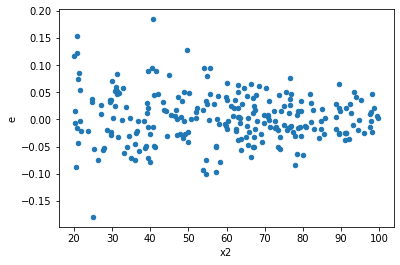

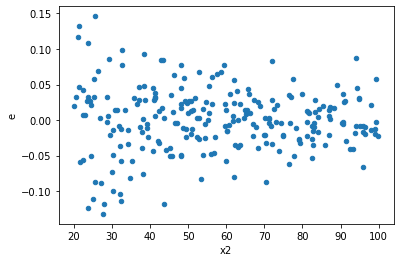

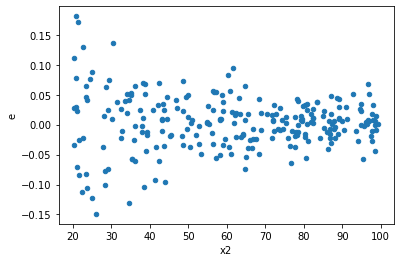

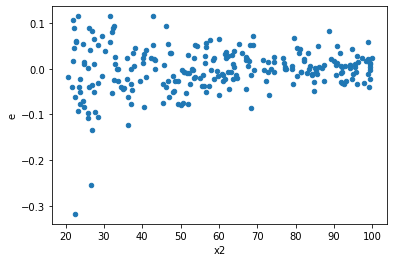

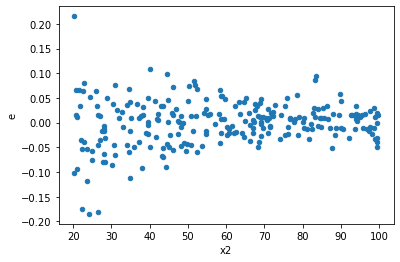

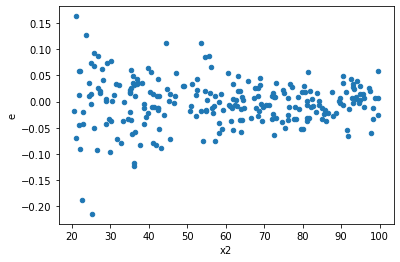

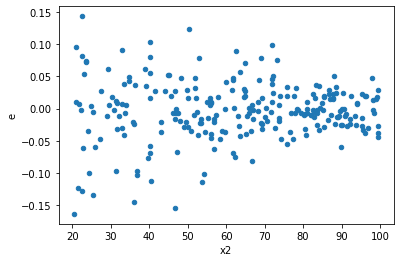

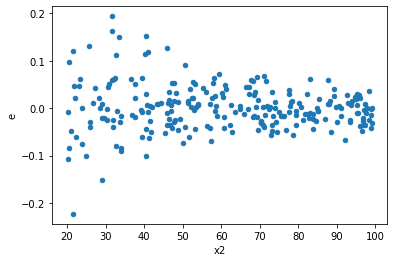

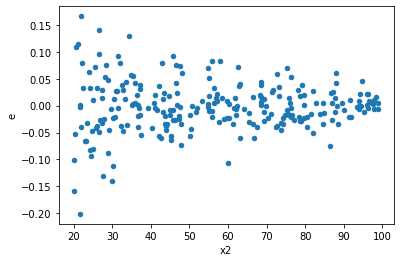

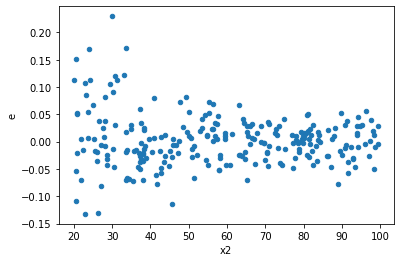

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,128.0,114.0,0.204535933140484,0.2917793674205682,0.0015979369776600312,0.0025594681352681422,1.6017328411888605,0.010631472984405477,0.9946842635077973,0.005315736492202738,Reject005=0 : Heteroscedasticity
1.0,129.0,113.0,0.1741896306044248,0.27454738963844527,0.001350307213987789,0.002429622917154383,1.7993112174666603,0.0015228559330620062,0.999238572033469,0.0007614279665310031,Reject005=0 : Heteroscedasticity
2.0,139.0,103.0,0.23818678585121897,0.2718622569600515,0.001713573998929633,0.0026394393879616653,1.5403124636638774,0.021325216970484506,0.9893373915147577,0.010662608485242253,Reject005=0 : Heteroscedasticity
9.0,115.0,127.0,0.1859497354696208,0.40211571980018596,0.0016169542214749635,0.0031662655102376847,1.9581664515829402,0.00023964456813718726,0.9998801777159314,0.00011982228406859363,Reject005=0 : Heteroscedasticity
11.0,124.0,118.0,0.18585984487679388,0.2919382203876104,0.0014988697167483379,0.0024740527151492406,1.6506122496867,0.006361420820421015,0.9968192895897895,0.0031807104102105077,Reject005=0 : Heteroscedasticity
12.0,114.0,128.0,0.11954388248217225,0.376991828889834,0.0010486305480892303,0.0029452486632018282,2.808661895811193,2.1865119048669612e-08,0.9999999890674405,1.0932559524334806e-08,Reject005=0 : Heteroscedasticity
14.0,132.0,110.0,0.20309569679196135,0.2721562976653764,0.0015386037635754647,0.002474148160594331,1.6080476462925148,0.010445597752058333,0.9947772011239708,0.005222798876029167,Reject005=0 : Heteroscedasticity
15.0,108.0,134.0,0.1509699777069261,0.3343658633821168,0.0013978701639530194,0.002495267637179976,1.785049643039551,0.001476100167698613,0.9992619499161507,0.0007380500838493065,Reject005=0 : Heteroscedasticity
18.0,138.0,104.0,0.19524160029684232,0.33317655030012927,0.001414794205049582,0.0032036206759627813,2.2643722065927667,1.7468897625327884e-05,0.9999912655511873,8.734448812663942e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,114.0,0.204535933140484,0.2917793674205682,0.0015979369776600312,0.0025594681352681422,1.6017328411888605,0.010631472984405477,Reject005=0 : Heteroscedasticity
1.0,129.0,113.0,0.1741896306044248,0.27454738963844527,0.001350307213987789,0.002429622917154383,1.7993112174666603,0.0015228559330620062,Reject005=0 : Heteroscedasticity
2.0,139.0,103.0,0.23818678585121897,0.2718622569600515,0.001713573998929633,0.0026394393879616653,1.5403124636638774,0.021325216970484506,Reject005=0 : Heteroscedasticity
3.0,125.0,117.0,0.30358154999513753,0.17678835767288772,0.0024286523999611,0.0015110116040417754,0.6221605051698536,0.009324164773874384,Reject005=0 : Heteroscedasticity
4.0,132.0,110.0,0.3688615003955723,0.16965889241590176,0.002794405306027063,0.0015423535674172887,0.5519434006551202,0.0011162648572542442,Reject005=0 : Heteroscedasticity
5.0,121.0,121.0,0.32205117312224557,0.20521331588463937,0.002661579943159054,0.0016959778172284245,0.637207167715373,0.013770682862522142,Reject005=0 : Heteroscedasticity
6.0,123.0,119.0,0.37405593954448446,0.17147723545018292,0.003041105199548654,0.0014409851718502767,0.47383601595371994,4.867917516885037e-05,Reject005=0 : Heteroscedasticity
7.0,116.0,126.0,0.373619453916958,0.15361073301763875,0.003220857361353086,0.0012191328017272917,0.37851188828030946,2.0687342198917918e-07,Reject005=0 : Heteroscedasticity
8.0,153.0,89.0,0.4172279073303884,0.1391769611463082,0.0027269797864731267,0.0015637860802955978,0.5734498246201094,0.002571463804421191,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    816
Reject005=1 : Homoscedasticity      184
Name: Result_test, dtype: int64